# SWCON253 Machine Learning

# Model Evaluation

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
import sklearn
sklearn.set_config(print_changed_only=True)
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Problems with accuracy and unbalanced data

[[47  6]
 [ 4 86]]
0.9300699300699301


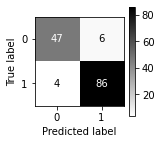

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r', ax=ax)
plt.savefig("images/plot_confusion_matrix.png")

In [ ]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

In [ ]:
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

0.9
0.9
0.9


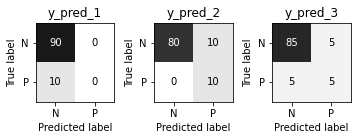

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['N', 'P']).plot(ax=ax, cmap='gray_r')
    ax.set_title("y_pred_{}".format(i + 1))
    ax.images[-1].colorbar.remove()
    ax.images[0].set_norm(Normalize(vmin=0, vmax=100))
#plt.tight_layout()
plt.savefig("images/problems_with_accuracy.png")

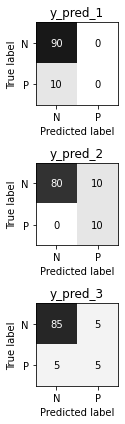

In [ ]:
fig, axes = plt.subplots(3, figsize=(3, 6))
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['N', 'P']).plot(ax=ax, cmap='gray_r')
    ax.set_title("y_pred_{}".format(i + 1))
    ax.images[-1].colorbar.remove()
    ax.images[0].set_norm(Normalize(vmin=0, vmax=100))
plt.tight_layout()
plt.savefig("images/confusion_matrix_col.png")

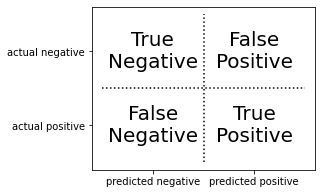

In [ ]:
def make_2x2_matrix(labels, fontsize=20):
    plt.figure(figsize=(4, 3))
    plt.vlines([.5], ymin=-.5, ymax=1.5, linestyle=':')
    plt.hlines([.5], xmin=-.5, xmax=1.5, linestyle=':')
    plt.xticks([0, 1], ['predicted negative', 'predicted positive'])
    plt.yticks([1, 0], ['actual negative', 'actual positive'])
    a = plt.text(0, 1, labels[0], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    b = plt.text(0, 0, labels[1], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    c = plt.text(1, 1, labels[2], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    d = plt.text(1, 0, labels[3], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    return a, b, c, d
make_2x2_matrix(['True\nNegative', 'False\nNegative', 'False\nPositive', 'True\nPositive'])
plt.savefig("images/confusion_matrix.png")

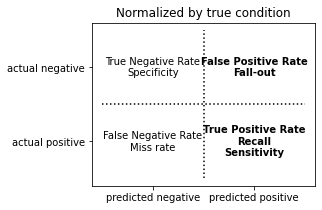

In [ ]:
res = make_2x2_matrix(['True Negative Rate\nSpecificity', 'False Negative Rate\nMiss rate', 'False Positive Rate\nFall-out', 'True Positive Rate\nRecall\nSensitivity'],
               fontsize=10)
res[2].set_fontweight('bold')
res[3].set_fontweight('bold')
plt.title("Normalized by true condition")
plt.savefig("images/confusion_matrix_norm_true.png")


In [ ]:
asdf = res[0]
asdf

Text(0, 1, 'True Negative Rate\nSpecificity')

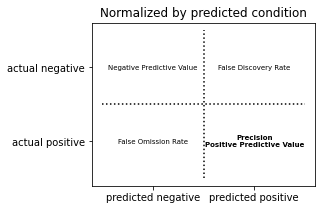

In [ ]:
res = make_2x2_matrix(['Negative Predictive Value', 'False Omission Rate', 'False Discovery Rate', 'Precision\nPositive Predictive Value'],
               fontsize=7)
res[3].set_fontweight('bold')
plt.title("Normalized by predicted condition")
plt.savefig("images/confusion_matrix_norm_pred.png")

In [ ]:
from sklearn.metrics import classification_report
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        90
           1       0.50      1.00      0.67        10

    accuracy                           0.90       100
   macro avg       0.75      0.94      0.80       100
weighted avg       0.95      0.90      0.91       100

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        90
           1       0.50      0.50      0.50        10

    accuracy                           0.90       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
# logistic regresson on breast cancer, but change threshold:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        53
           1       0.99      0.90      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



# Precision-recall curves

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_recall_curve

data = fetch_openml('mammography', as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target == '1', random_state=0)

svc = SVC().fit(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svc = make_pipeline(StandardScaler(), SVC(C=1000, gamma=0.01))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.01))])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': np.logspace(-3, 3, 7), 'svc__gamma': np.logspace(-6, 0, 7)}
grid = GridSearchCV(svc, param_grid, verbose=10, scoring='average_precision')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] svc__C=0.001, svc__gamma=1e-06 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-06, score=0.527, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-06 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-06, score=0.600, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-06 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-06, score=0.453, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-06 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-06, score=0.433, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] svc__C=0.001, svc__gamma=1e-06 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-06, score=0.688, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-05 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-05, score=0.525, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-05 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-05, score=0.593, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-05 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-05, score=0.451, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-05 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV] ...... svc__C=0.001, svc__gamma=1e-05, score=0.432, total=   0.0s
[CV] svc__C=0.001, svc__gamma=1e-05 ..................................
[CV] ...... svc__C=0.001, svc__gamma=1e-05, score=0.673, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.0001 .................................
[CV] ..... svc__C=0.001, svc__gamma=0.0001, score=0.529, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.0001 .................................
[CV] ..... svc__C=0.001, svc__gamma=0.0001, score=0.601, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.0001 .................................
[CV] ..... svc__C=0.001, svc__gamma=0.0001, score=0.448, total=   0.0s

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s



[CV] svc__C=0.001, svc__gamma=0.0001 .................................
[CV] ..... svc__C=0.001, svc__gamma=0.0001, score=0.433, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.0001 .................................
[CV] ..... svc__C=0.001, svc__gamma=0.0001, score=0.670, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001 ..................................
[CV] ...... svc__C=0.001, svc__gamma=0.001, score=0.537, total=   0.1s
[CV] svc__C=0.001, svc__gamma=0.001 ..................................
[CV] ...... svc__C=0.001, svc__gamma=0.001, score=0.599, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001 ..................................
[CV] ...... svc__C=0.001, svc__gamma=0.001, score=0.470, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001 ..................................
[CV] ...... svc__C=0.001, svc__gamma=0.001, score=0.434, total=   0.0s
[CV] svc__C=0.001, svc__gamma=0.001 ..................................
[CV] ...... svc__C=0.001, svc__gamma=0.001, score=0.680, total=   0.0s
[CV] 

[CV] ........ svc__C=0.1, svc__gamma=1e-06, score=0.527, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-06 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-06, score=0.592, total=   0.1s
[CV] svc__C=0.1, svc__gamma=1e-06 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-06, score=0.453, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-06 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-06, score=0.433, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-06 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-06, score=0.688, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-05 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-05, score=0.525, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-05 ....................................
[CV] ........ svc__C=0.1, svc__gamma=1e-05, score=0.634, total=   0.0s
[CV] svc__C=0.1, svc__gamma=1e-05 ....................................
[CV] .

[CV] .......... svc__C=1.0, svc__gamma=0.1, score=0.707, total=   0.1s
[CV] svc__C=1.0, svc__gamma=0.1 ......................................
[CV] .......... svc__C=1.0, svc__gamma=0.1, score=0.688, total=   0.0s
[CV] svc__C=1.0, svc__gamma=0.1 ......................................
[CV] .......... svc__C=1.0, svc__gamma=0.1, score=0.554, total=   0.1s
[CV] svc__C=1.0, svc__gamma=0.1 ......................................
[CV] .......... svc__C=1.0, svc__gamma=0.1, score=0.557, total=   0.1s
[CV] svc__C=1.0, svc__gamma=0.1 ......................................
[CV] .......... svc__C=1.0, svc__gamma=0.1, score=0.806, total=   0.1s
[CV] svc__C=1.0, svc__gamma=1.0 ......................................
[CV] .......... svc__C=1.0, svc__gamma=1.0, score=0.699, total=   0.1s
[CV] svc__C=1.0, svc__gamma=1.0 ......................................
[CV] .......... svc__C=1.0, svc__gamma=1.0, score=0.665, total=   0.1s
[CV] svc__C=1.0, svc__gamma=1.0 ......................................
[CV] .

[CV] ...... svc__C=100.0, svc__gamma=0.001, score=0.682, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.001 ..................................
[CV] ...... svc__C=100.0, svc__gamma=0.001, score=0.693, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.001 ..................................
[CV] ...... svc__C=100.0, svc__gamma=0.001, score=0.601, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.001 ..................................
[CV] ...... svc__C=100.0, svc__gamma=0.001, score=0.580, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.001 ..................................
[CV] ...... svc__C=100.0, svc__gamma=0.001, score=0.753, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.01 ...................................
[CV] ....... svc__C=100.0, svc__gamma=0.01, score=0.715, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.01 ...................................
[CV] ....... svc__C=100.0, svc__gamma=0.01, score=0.709, total=   0.1s
[CV] svc__C=100.0, svc__gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   19.3s finished


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(C=1000, gamma=0.01))]),
             param_grid={'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ]),
                         'svc__gamma': array([0.   , 0.   , 0.   , 0.001, 0.01 , 0.1  , 1.   ])},
             scoring='average_precision', verbose=10)

In [ ]:
grid.best_params_

{'svc__C': 1000.0, 'svc__gamma': 0.01}

In [ ]:
grid.best_score_

0.699226756818868

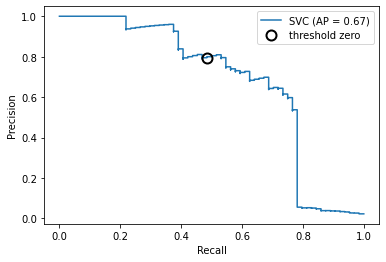

In [ ]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_fscore_support
pr_svc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
# also compute the precision/recall trade-off from predict
p_svc, r_svc, _, _ = precision_recall_fscore_support(svc.predict(X_test), y_test, average='binary')
plt.plot(p_svc, r_svc, 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend()
plt.savefig("images/precision_recall_curve.png")

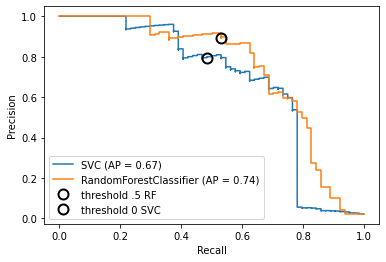

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, max_features=2)
rf.fit(X_train, y_train)

pr_svc.plot(name='SVC')
pr_rf = plot_precision_recall_curve(rf, X_test, y_test, ax=plt.gca())

p_rf, r_rf, _, _ = precision_recall_fscore_support(rf.predict(X_test), y_test, average='binary')
plt.plot(p_rf, r_rf, 'o', markersize=10, label="threshold .5 RF", fillstyle="none", c='k', mew=2)
plt.plot(p_svc, r_svc, 'o', markersize=10, label="threshold 0 SVC", fillstyle="none", c='k', mew=2)
plt.legend()
plt.savefig("images/rf_vs_svc.png")

# F1 vs average precision

In [ ]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(
      f1_score(y_test, rf.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.667
f1_score of svc: 0.602


In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.737
Average precision of svc: 0.674


# ROC Curve

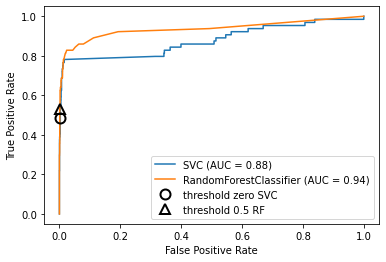

In [ ]:
from sklearn.metrics import plot_roc_curve
confusion_svc = confusion_matrix(y_test, svc.predict(X_test), normalize='true')
confusion_rf = confusion_matrix(y_test, rf.predict(X_test), normalize='true')

plot_roc_curve(svc, X_test, y_test, name='SVC')
plot_roc_curve(rf, X_test, y_test, ax=plt.gca())
plt.plot(confusion_svc[0, 1], confusion_svc[1, 1], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
plt.plot(confusion_rf[0, 1], confusion_rf[1, 1], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Multi-class classification

In [ ]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
 # data is between 0 and 16
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.962
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  1  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      1.00      0.99        44
           3       1.00      0.96      0.98        45
           4       0.95      0.97      0.96        38
           5       0.96      0.96      0.96        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.96      0.90      0.92        48
           9       0.92      0.98      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_test, pred, average='micro'), recall_score(y_test, pred, average='weighted')

(0.9622222222222222, 0.9622222222222222)

In [ ]:
from sklearn.metrics.scorer import SCORERS
print("\n".join(sorted(SCORERS.keys())))

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
v_measure_score


In [ ]:
import itertools
print("\n".join([("{:<30} " * 3).format(*[y[1] for y in x[1]]) for x in itertools.groupby(enumerate(sorted(SCORERS.keys())), key=lambda x: x[0] // 3)]))

accuracy                       adjusted_mutual_info_score     adjusted_rand_score            
average_precision              balanced_accuracy              completeness_score             
explained_variance             f1                             f1_macro                       
f1_micro                       f1_samples                     f1_weighted                    
fowlkes_mallows_score          homogeneity_score              jaccard                        
jaccard_macro                  jaccard_micro                  jaccard_samples                
jaccard_weighted               max_error                      mutual_info_score              
neg_brier_score                neg_log_loss                   neg_mean_absolute_error        
neg_mean_gamma_deviance        neg_mean_poisson_deviance      neg_mean_squared_error         
neg_mean_squared_log_error     neg_median_absolute_error      neg_root_mean_squared_error    
normalized_mutual_info_score   precision                    